In [ ]:
from google.colab import drive
# Mounting google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
workspace_dir = "."
!cp "/content/drive/MyDrive/CSCI_635/facades.tar.gz" "{workspace_dir}"

In [ ]:
!tar -xf /content/facades.tar.gz

In [ ]:
# !pip install torchvision --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 129.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import glob
import os
from torchvision.io import read_image
import torchvision.transforms as tv_transforms
import matplotlib.pyplot as plt
from torch.nn import functional as functional
import numpy as np

In [ ]:
# Define constants
IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 1
#torch.autograd.set_detect_anomaly(True)

In [ ]:
# Transformer class
class Transformer(object):
    def __init__(self,):
        pass
    def __call__(self, imgA, imgB=None):
        pass


class ToTensor(Transformer):
    """convert provided images to torch.tensor"""
    def __init__(self,):
        super().__init__()

    def __call__(self, imgA, imgB=None):
        imgA = np.array(imgA)/255.
        imgA = torch.from_numpy(imgA).float().permute(2, 0, 1)
        if imgB is None:
            return imgA
        imgB = np.array(imgB)/255.
        imgB = torch.from_numpy(imgB).float().permute(2, 0, 1)
        return imgA, imgB

In [ ]:
# Class to read image dataset
class ImageDataset(Dataset):
    def __init__(self, file_paths, random_changes=True):
        self.file_paths = file_paths
        self.random_changes = random_changes

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        input_image, real_image = self.load_image(self.file_paths[idx])
        return input_image, real_image

    def load_image(self, image_file):
        img = Image.open(image_file).convert('RGB')

        # Split the image into left and right halves
        width = img.width
        real_image = img.crop((0, 0, width // 2, img.height))
        input_image = img.crop((width // 2, 0, width, img.height))

        # Transform image
        transform = transforms.Compose([
            transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
            ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])
        ])

        input_image = transform(input_image)
        real_image = transform(real_image)
        # input_image = input_image.permute(1, 2, 0)
        # real_image = real_image.permute(1, 2, 0)
        return input_image, real_image


In [ ]:
train_dataset = ImageDataset(file_paths=glob.glob('/content/facades/train/*.jpg'))
test_dataset = ImageDataset(file_paths=glob.glob('/content/facades/val/*.jpg'))

# Load image dataset
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


Feature batch shape: torch.Size([1, 3, 256, 256])
Labels batch shape: torch.Size([1, 3, 256, 256])


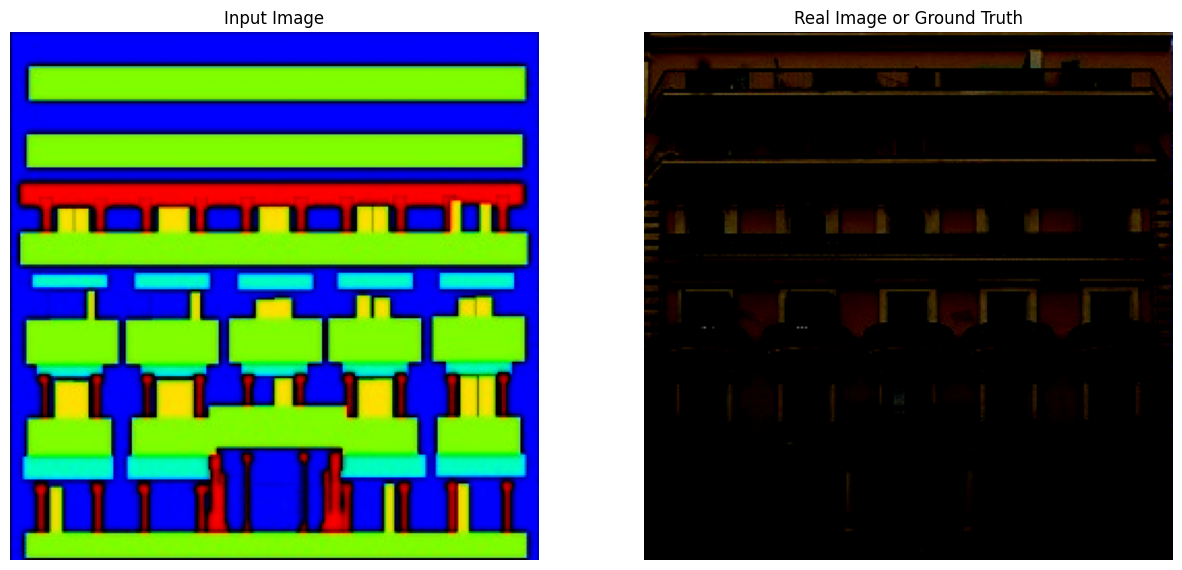

In [ ]:
# Display one image from the dataset
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
real_img = train_labels[0].squeeze()
label = train_labels[0]
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(img.permute(1, 2, 0))
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_img.permute(1, 2, 0))
plt.title("Real Image or Ground Truth")
plt.axis('off')

plt.show()

In [ ]:
# The discriminator class
class Discriminator(nn.Module):
    def __init__(self, input_channels=3):
        super(Discriminator, self).__init__()
        # Defining layers for discriminator
        self.model = nn.Sequential(
            nn.Conv2d(6, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, kernel_size=4, padding=1),
            nn.Sigmoid()
        )

    def forward(self, input_src, input_target):
        # Function for discriminator forward pass
        merged = torch.cat([input_src, input_target], dim=1)
        return self.model(merged.clone())


In [ ]:
# Defining encoder block for generator network
class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, batch_norm=True):
        super(EncoderBlock, self).__init__()
        # Defining layers for Encoder
        layers = [
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1)
        ]

        if batch_norm:
            layers.append(nn.BatchNorm2d(out_channels))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


In [ ]:
# Defining decoder block for generator network
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=True):
        super(DecoderBlock, self).__init__()
        # Defining layers for Decoder
        layers = [
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(out_channels)

        ]

        if dropout:
            layers.append(nn.Dropout2d(p=0.5, inplace=True))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = self.model(x)
        # if skip is not None:
        #   x = torch.cat([x, skip], dim=1)
        return x


In [ ]:
class Generator(nn.Module):
    def __init__(self, input_channels=3, output_channels=3):
        super(Generator, self).__init__()

        # Encoder
        self.e1 = nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1)
        self.e2 = EncoderBlock(64, 128)
        self.e3 = EncoderBlock(128, 256)
        self.e4 = EncoderBlock(256, 512)
        self.e5 = EncoderBlock(512, 512)
        self.e6 = EncoderBlock(512, 512)
        self.e7 = EncoderBlock(512, 512)
        self.e8 = EncoderBlock(512, 512, batch_norm=False)

        # Bottleneck
        self.b = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True)
        )

        # Decoder
        self.d8 = DecoderBlock(512, 512)
        self.d7 = DecoderBlock(2*512, 512)
        self.d6 = DecoderBlock(2*512, 512)
        self.d5 = DecoderBlock(2*512, 512, dropout=False)
        self.d4 = DecoderBlock(2*512, 256, dropout=False)
        self.d3 = DecoderBlock(2*256, 128, dropout=False)
        self.d2 = DecoderBlock(2*128, 64, dropout=False)
        self.d1 = nn.ConvTranspose2d(2*64, 3, kernel_size=4, stride=2, padding=1)

        # Output
        self.out_image = nn.Sequential(
            #nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        e1 = self.e1(x)
        e2 = self.e2(e1)
        e3 = self.e3(e2)
        e4 = self.e4(e3)
        e5 = self.e5(e4)
        e6 = self.e6(e5)
        e7 = self.e7(e6)
        e8 = self.e8(e7)

        d8 = self.d8(e8)
        d8 = torch.cat([d8, e7], dim=1)
        d7 = self.d7(d8)
        d7 = torch.cat([d7, e6], dim=1)
        d6 = self.d6(d7)
        d6 = torch.cat([d6, e5], dim=1)
        d5 = self.d5(d6)
        d5 = torch.cat([d5, e4], dim=1)
        d4 = self.d4(d5)
        d4 = torch.cat([d4, e3], dim=1)
        d3 = self.d3(d4)
        d3 = torch.cat([d3, e2], dim=1)
        d2 = functional.relu(self.d2(d3))
        d2 = torch.cat([d2, e1], dim=1)
        d1 = self.d1(d2)
        return self.out_image(d1)


In [ ]:
# Defining the GAN class
class GAN(nn.Module):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def forward(self, input_image, target, g_criterion,d_criterion):
        # Forward pass through the generator
        generated_images = self.generator(input_image)

        # Forward pass through the discriminator
        fake_dis_prediction = self.discriminator(generated_images, input_image)

        # Calculate Generator Loss
        gen_loss = g_criterion(generated_images, target, fake_dis_prediction)

        fake_dis_pred_detach = self.discriminator(self.generator(input_image).detach(), input_image)
        real_dis_prediction = self.discriminator(input_image, input_image)

        # Calculate Discriminator Loss
        d_loss = d_criterion(fake_dis_pred_detach, real_dis_prediction)

        #return real_dis_prediction, fake_dis_prediction, fake_dis_pred_detach, generated_images
        return gen_loss, d_loss


In [ ]:
# initializing Generator and Discriminator
input_channels = 3
generator = Generator(input_channels=input_channels, output_channels=3).to('cuda:0')
discriminator = Discriminator(input_channels=input_channels).to('cuda:0')
print(generator)
print("--------------------------------------------------")
print(discriminator)


Generator(
  (e1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (e2): EncoderBlock(
    (model): Sequential(
      (0): LeakyReLU(negative_slope=0.2, inplace=True)
      (1): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (e3): EncoderBlock(
    (model): Sequential(
      (0): LeakyReLU(negative_slope=0.2, inplace=True)
      (1): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (e4): EncoderBlock(
    (model): Sequential(
      (0): LeakyReLU(negative_slope=0.2, inplace=True)
      (1): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (e5): EncoderBlock(
    (model): Sequential(
      (0): LeakyReLU(

In [ ]:
# Initializing GAN
gan = GAN(generator, discriminator).to('cuda:0')

# Loss function
criterion = nn.BCEWithLogitsLoss()
l1_criterion = nn.L1Loss()

In [ ]:
# Initializing optimizers
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [ ]:
class GeneratorLoss(nn.Module):
    def __init__(self, alpha=100):
        super().__init__()
        self.alpha=alpha
        self.bce=nn.BCEWithLogitsLoss()
        self.l1=nn.L1Loss()

    def forward(self, fake, real, fake_pred):
        fake_target = torch.ones_like(fake_pred)
        loss = self.bce(fake_pred, fake_target) + self.alpha* self.l1(fake, real)
        return loss


class DiscriminatorLoss(nn.Module):
    def __init__(self,):
        super().__init__()
        self.loss_fn = nn.BCEWithLogitsLoss()

    def forward(self, fake_pred, real_pred):
        fake_target = torch.zeros_like(fake_pred)
        real_target = torch.ones_like(real_pred)
        fake_loss = self.loss_fn(fake_pred, fake_target)
        real_loss = self.loss_fn(real_pred, real_target)
        loss = (fake_loss + real_loss)/2
        return loss



def train_step(input_image, target, g_criterion, d_criterion):
    input_image, target = input_image.to('cuda:0'), target.to('cuda:0')

    # Forward pass
    gen_loss, disc_loss = gan(input_image, target, g_criterion,d_criterion)

    # Backward and optimize
    generator_optimizer.zero_grad()
    gen_loss.backward()
    generator_optimizer.step()

    discriminator_optimizer.zero_grad()
    disc_loss.backward()
    discriminator_optimizer.step()



    return gen_loss.item(), disc_loss.item()


In [ ]:
def fit(train_ds, test_ds, steps):
    dataloader = DataLoader(train_ds, batch_size=1, shuffle=True)
    g_criterion = GeneratorLoss(alpha=100)
    d_criterion = DiscriminatorLoss()
    for step in range(steps):
        for input_image, target in dataloader:
            gen_loss, disc_loss = train_step(input_image, target, g_criterion, d_criterion)

        if step % 5 == 0:
            print(f"Step: {step}, Generator Loss: {gen_loss}, Discriminator Loss: {disc_loss}")

        if step % 50 == 0:
            # Save the generator's state_dict
            generator_state_path = f'./checkpoints/generator_{step}.pth'
            # Create the directory if it doesn't exist
            os.makedirs(os.path.dirname(generator_state_path), exist_ok=True)
            torch.save(generator.state_dict(), generator_state_path)

            # Copy the file to Google Drive
            workspace_dir = "."
            target_drive_path = "/content/drive/MyDrive/CSCI_635/"

            # Create the target directory if it doesn't exist
            target_drive_dir = os.path.join(target_drive_path, "checkpoints")
            os.makedirs(target_drive_dir, exist_ok=True)

            # Copy the file to the target directory in Google Drive
            %cp "{generator_state_path}" "{target_drive_dir}"



In [ ]:
fit(train_dataset, test_dataset, steps=501)

Step: 0, Generator Loss: 36.204837799072266, Discriminator Loss: 0.5032179355621338
Step: 2, Generator Loss: 30.928163528442383, Discriminator Loss: 0.5032109022140503
Step: 4, Generator Loss: 35.13370895385742, Discriminator Loss: 0.5032071471214294
Step: 6, Generator Loss: 33.064640045166016, Discriminator Loss: 0.5032060146331787
Step: 8, Generator Loss: 31.976911544799805, Discriminator Loss: 0.5032057166099548
Step: 10, Generator Loss: 38.8778076171875, Discriminator Loss: 0.5032058358192444
Step: 12, Generator Loss: 22.26565170288086, Discriminator Loss: 0.5032049417495728
Step: 14, Generator Loss: 28.234987258911133, Discriminator Loss: 0.5032047033309937
Step: 16, Generator Loss: 28.370779037475586, Discriminator Loss: 0.5032047629356384
Step: 18, Generator Loss: 21.5941162109375, Discriminator Loss: 0.5032045841217041
Step: 20, Generator Loss: 23.34598731994629, Discriminator Loss: 0.5032045245170593
Step: 22, Generator Loss: 18.97875213623047, Discriminator Loss: 0.5032045245